In [7]:
from keras.applications import inception_v3
from keras import backend as K

K.set_learning_phase(0)
model = inception_v3.InceptionV3(weights='imagenet',include_top=False)

#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

In [42]:
#layer_contributions = {
#    'mixed2': 0.2,
#    'mixed3': 3.0,
#    'mixed4': 2.0,
#    'mixed5': 1.5,
#}
layer_contributions = {
    'mixed2': 0.2,
    'mixed3': 3.0,
    'mixed4': 2.0,
    'mixed5': 1.5,
}
# creates dictionary
layer_dict = dict([(layer.name, layer) for layer in model.layers])
# loss variable add losses here
loss = K.variable(0.)
for layer_name in layer_contributions:
    coeff = layer_contributions[layer_name]
    # get output of layer
    activation = layer_dict[layer_name].output
    print(activation.shape)
    scaling = K.prod(K.cast(K.shape(activation), 'float'))
    #loss.assign_add(coeff * K.sum(K.square(activation[:,2:-2,2:-2,:])) / scaling)
    loss += coeff * K.sum(K.square(activation[:,2:-2,2:-2,:])) / scaling
    
print(activation.shape)
print(type(loss))
print(activation)

(?, ?, ?, 288)
(?, ?, ?, 768)
(?, ?, ?, 768)
(?, ?, ?, 768)
(?, ?, ?, 768)
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("mixed5_1/concat:0", shape=(?, ?, ?, 768), dtype=float32)


In [43]:
# dream hlds create dream image
dream = model.input
# calculate gradients based on loss
grads = K.gradients(loss, dream)[0]
# normalisation of gradients
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)
# function to pass input image and return loss and gradients
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

# function to repead gradient descent
def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values

def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...Wert der Verlustfunktion bei', i, ':', loss_value)
        x += step * grad_values
    return x

In [44]:
import scipy
from keras.preprocessing import image
from matplotlib import pyplot as plt

def resize_img(img,size):
    img = np.copy(img)
    factors = (1, 
              float(size[0]) / img.shape[1],
              float(size[1]) / img.shape[2],
              1)
    return scipy.ndimage.zoom(img, factors, order=1)

def save_img(img,fname):
    #pil_img = deprocess_image(np.copy(img))
    #scipy.misc.imsave(fname, pil_img)
    plt.imshow(deprocess_image(np.copy(img)))
    plt.savefig(fname)
    plt.show()

def preprocess_image(image_path):
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img

# function to convert tensor to image
def deprocess_image(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1,2,0))
    else:
        # revert changes from inception_v3.preprocess_input
        x = x.reshape((x.shape[1],x.shape[2],3))
    x /= 2.0
    x += 0.5
    x *= 255.0
    x = np.clip(x,0,255).astype('uint')
    return x


    

orig_shape: (557, 630)
Shape verarbeiten (146, 165)
...Wert der Verlustfunktion bei 0 : 1.3594613
...Wert der Verlustfunktion bei 1 : 1.9265263
...Wert der Verlustfunktion bei 2 : 2.4572937
...Wert der Verlustfunktion bei 3 : 2.9363494
...Wert der Verlustfunktion bei 4 : 3.436215
...Wert der Verlustfunktion bei 5 : 3.912287
...Wert der Verlustfunktion bei 6 : 4.297423
...Wert der Verlustfunktion bei 7 : 4.769568
...Wert der Verlustfunktion bei 8 : 5.1803946
...Wert der Verlustfunktion bei 9 : 5.5773296
...Wert der Verlustfunktion bei 10 : 6.06175
...Wert der Verlustfunktion bei 11 : 6.4701447
...Wert der Verlustfunktion bei 12 : 6.7276816
...Wert der Verlustfunktion bei 13 : 7.09005
...Wert der Verlustfunktion bei 14 : 7.5012045
...Wert der Verlustfunktion bei 15 : 7.8669496
...Wert der Verlustfunktion bei 16 : 8.242459
...Wert der Verlustfunktion bei 17 : 8.671762
...Wert der Verlustfunktion bei 18 : 8.939513
...Wert der Verlustfunktion bei 19 : 9.33832


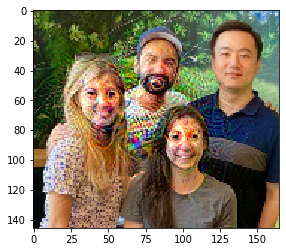

Shape verarbeiten (161, 182)
...Wert der Verlustfunktion bei 0 : 4.073122
...Wert der Verlustfunktion bei 1 : 5.7335367
...Wert der Verlustfunktion bei 2 : 6.797012
...Wert der Verlustfunktion bei 3 : 7.658258
...Wert der Verlustfunktion bei 4 : 8.469815
...Wert der Verlustfunktion bei 5 : 9.156278
...Wert der Verlustfunktion bei 6 : 9.808495


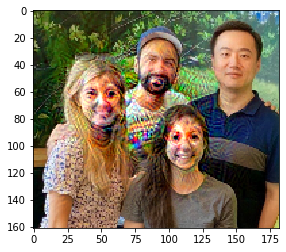

Shape verarbeiten (177, 200)
...Wert der Verlustfunktion bei 0 : 4.6800776
...Wert der Verlustfunktion bei 1 : 6.4776416
...Wert der Verlustfunktion bei 2 : 7.812389
...Wert der Verlustfunktion bei 3 : 8.453297
...Wert der Verlustfunktion bei 4 : 9.086043


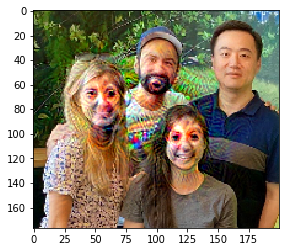

Shape verarbeiten (195, 220)
...Wert der Verlustfunktion bei 0 : 4.599432
...Wert der Verlustfunktion bei 1 : 6.503599
...Wert der Verlustfunktion bei 2 : 7.728494
...Wert der Verlustfunktion bei 3 : 8.753344
...Wert der Verlustfunktion bei 4 : 9.694141


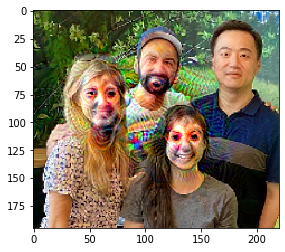

Shape verarbeiten (214, 242)
...Wert der Verlustfunktion bei 0 : 4.943596
...Wert der Verlustfunktion bei 1 : 6.8528204
...Wert der Verlustfunktion bei 2 : 8.092799
...Wert der Verlustfunktion bei 3 : 9.079213
...Wert der Verlustfunktion bei 4 : 9.90268


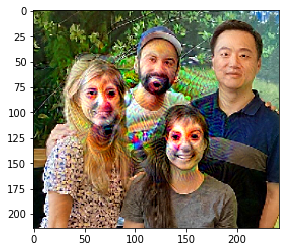

Shape verarbeiten (236, 267)
...Wert der Verlustfunktion bei 0 : 5.040983
...Wert der Verlustfunktion bei 1 : 6.859989
...Wert der Verlustfunktion bei 2 : 8.149336
...Wert der Verlustfunktion bei 3 : 9.219753


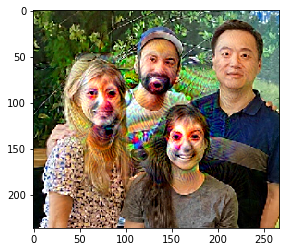

Shape verarbeiten (259, 293)
...Wert der Verlustfunktion bei 0 : 5.083481
...Wert der Verlustfunktion bei 1 : 6.958689
...Wert der Verlustfunktion bei 2 : 8.268984
...Wert der Verlustfunktion bei 3 : 9.345381


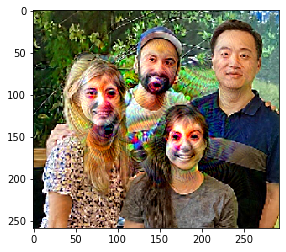

Shape verarbeiten (285, 323)
...Wert der Verlustfunktion bei 0 : 5.2286434
...Wert der Verlustfunktion bei 1 : 7.199726
...Wert der Verlustfunktion bei 2 : 8.724251


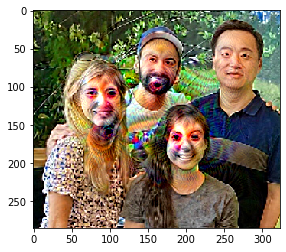

Shape verarbeiten (314, 355)
...Wert der Verlustfunktion bei 0 : 5.642957
...Wert der Verlustfunktion bei 1 : 8.335139


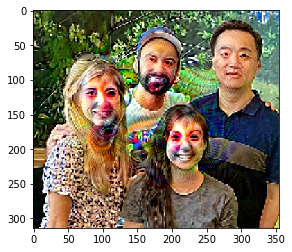

Shape verarbeiten (345, 391)
...Wert der Verlustfunktion bei 0 : 6.2890115
...Wert der Verlustfunktion bei 1 : 9.70662


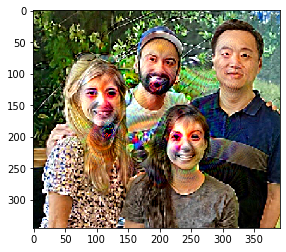

Shape verarbeiten (380, 430)
...Wert der Verlustfunktion bei 0 : 9.575472


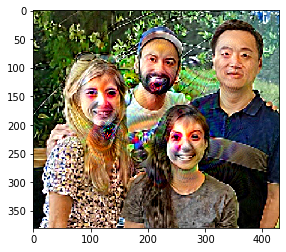

Shape verarbeiten (418, 473)
...Wert der Verlustfunktion bei 0 : 9.62537


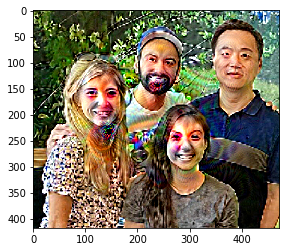

Shape verarbeiten (460, 520)


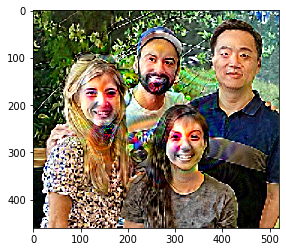

Shape verarbeiten (506, 572)


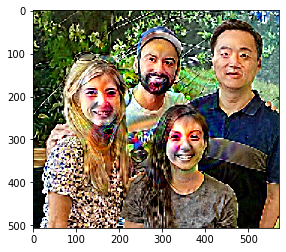

Shape verarbeiten (557, 630)
...Wert der Verlustfunktion bei 0 : 9.377396


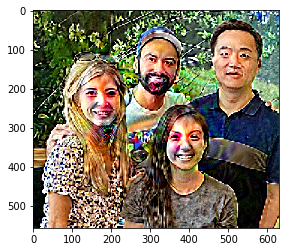

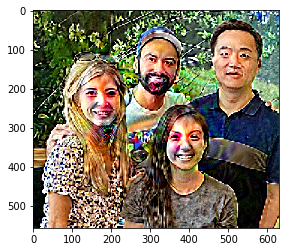

In [46]:
import numpy as np
#step = 0.01
#num_octave = 3
#octave_scale = 1.4
#iterations = 20
#max_loss = 10.0

step = 0.01
num_octave = 15
octave_scale = 1.1
iterations = 20
max_loss = 10.0

base_image_path = 'people.png'
img = preprocess_image(base_image_path)
original_shape = img.shape[1:3]
print('orig_shape:',original_shape)
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])
for shape in successive_shapes:
    print('Shape verarbeiten', shape)
    img = resize_img(img,shape)
    img = gradient_ascent(img, 
                         iterations = iterations,
                         step = step,
                         max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    img += lost_detail
    schrunk_original_img = resize_img(original_img,shape)
    save_img(img,fname='dream_at_scale_' + str(shape) + '.png')
    
save_img(img,fname='final_dream.png')

